<a href="https://colab.research.google.com/github/Eduflores1497/Examen-Parcial/blob/main/ExamenProblema19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

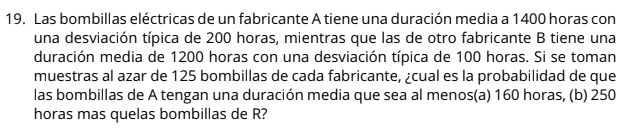

# **1,2,3.Identifique las variables aleatorias, su distribución de probabilidad y modele las variables aleatorias**

Vamos a tomar las variables aleatorias como la duración de las bombillas. Para el caso de la empresa A, la variable aleatoria queda definida como **A**.
\
Donde $A~sigue~una~distribución~normal~N(1400,200)$, donde la media son 1400 horas de duración y una desviación típica de 200 horas.

Para el caso de la empresa B, la variable aleatoria queda definida como **B**.
\
Donde $B~sigue~una~distribución~normal~N(1200,100)$, donde la media son 1200 horas de duración y una desviación típica de 100 horas.




#**4. Defina el modelo del sistema y los objetivos de la simulación**

Cada evento de este modelo representa la toma al azar de 125 bombillas de ambos fabricantes. Donde la variable aleatoria A representa la duración de las bombillas del fabricante A y la variable aleatoria B representa la duración de las bombillas del fabricante B.

Por lo que el modelo se define como
>$A-B$

**Objetivos del inciso a**


1.   Modelar el evento $A-B\geq160$ que representa que las bombillas del fabricante A tengan al menos 160 horas más de duración que las del fabricante B.

2.   Obtener $P(A-B\geq160)$

**Objetivos del inciso b**


1.   Modelar el evento $A-B\geq250$ que representa que las bombillas del fabricante A tengan al menos 250 horas más de duración que las del fabricante B.

2.   Obtener $P(A-B\geq250)$


**Para el inciso a)**

Representar un evento que cumpla con el modelo $A-B\geq160$

In [ ]:
import numpy as np
import random as rand
import math as mat
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
def eventoa():  #Función que simula un evento del inciso a
  exitos=0  #Contador de exitos
  A=rand.gauss(1400,200)  #Duración de una bombilla del fabricante A
  B=rand.gauss(1200,100)  #Duración de una bombilla del fabricante B
  if A-B>=160:  #Ver si se cumple el objetivo del inciso a A-B>=160
    exitos=exitos+1
  return exitos

In [ ]:
a=eventoa() #Simulamos sacar una bombilla de ambos fabricantes
print(a)  #Observamos si se cumplio que la duración de la bombilla A fue mayor por almenos 160 horas que la bombilla del fabricante B.

1


**Para el inciso b)**

Representar un evento que cumpla con el modelo $A-B\geq250$

In [ ]:
def eventob():  #Función que simula el evento del inciso b
  exitosb=0
  A=rand.gauss(1400,200)  #Duración de la bombilla del fabricante A
  B=rand.gauss(1200,100)  #Duración de la bombilla del fabricante B
  if A-B>=250:  #Vemos si se cumple el objetivo del inciso b A-B>=250
    exitosb=exitosb+1
  return exitosb

In [ ]:
b=eventob() #Simulamos sacar una bombilla de cada fabricante
print(b)  #Observamos si se cumple que la duración de la bombilla del fabricante A dura al menos 250 horas más que la del fabricante B.

1


# **5. Diseñe el experimento**

Aquí vamos a simular 125 veces ambos eventos para poder obtener las probabilidades de una muestra de los modelos de ambos incisos. Y finalmente, obtener la gráfica de estabilidad para cada inciso del ejercicio.

**5.a** Generar una muestra de tamaño 125, donde cada iteración es el evento de sacar una bombilla al azar de ambos fabricantes y obtener 
>$P(A-B\geq160)$

In [ ]:
def simulacionesa():  #Función que simula la toma de 125 bombillas al azar de ambos fabricantes
  exitosa=0
  prob=[]
  for i in range (125):
    exitosa=exitosa+eventoa() #El número de casos de exito de A-B>=160
    prob.append(exitosa/(i+1))  #P(A-B>=160) para una muestra de 125 bombillas de cada fabricante
  return prob

In [ ]:
incisoA=simulacionesa() #Simulamos la toma al azar de las 125 bombillas de ambos fabricantes

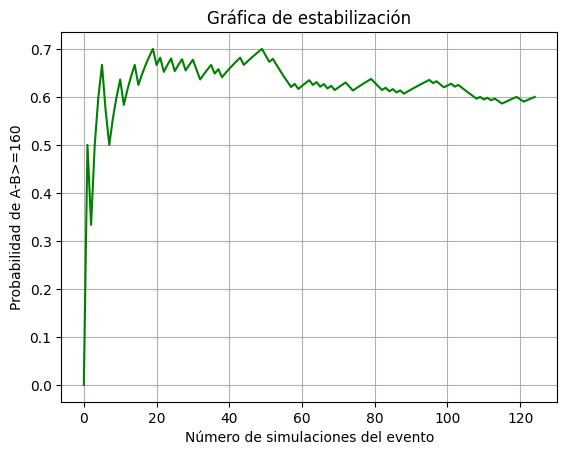

In [ ]:
plt.plot(incisoA,'g')
plt.grid(True)
plt.title('Gráfica de estabilización')
plt.xlabel('Número de simulaciones del evento')
plt.ylabel('Probabilidad de A-B>=160')
plt.show()

In [ ]:
np.mean(incisoA)  #P(A-B>=160) para una muestra

0.6219637007428008

**5.b** Generar una muestra de tamaño 125, donde cada iteración es el evento de sacar una bombillas al azar de ambos fabricantes y obtener 
>$P(A-B\geq250)$

In [ ]:
def simulacionesb():  #Función que simula la toma de 125 bomillas de ambos fabricantes
  exitosb=0
  probb=[]
  for i in range (125):
    exitosb=exitosb+eventob() #Número de casos exitosos de A-B>=250
    probb.append(exitosb/(i+1)) #P(A-B>=250) para una muestra de 125 bombillas de ambos fabricantes
  return probb

In [ ]:
incisob=simulacionesb()

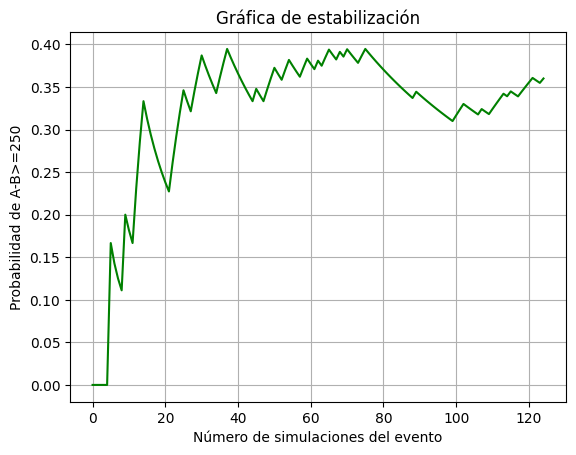

In [ ]:
plt.plot(incisob,'g')
plt.grid(True)
plt.title('Gráfica de estabilización')
plt.xlabel('Número de simulaciones del evento')
plt.ylabel('Probabilidad de A-B>=250')
plt.show()

In [ ]:
np.mean(incisob)  #P(A-B>=250) para una muestra

0.32123651849159707

# **6.Calcular N y repetir el experimento N veces**

Calculamos N para saber el número de muestras que necesitamos.

\

$$ N > \Bigg( \frac{2 \sigma z_{\alpha/2}}{\epsilon} \Bigg) ^2 $$

**Inciso a**

In [ ]:
na= (2*np.std(incisoA)*1.96/0.01)**2 #Calculo de N
print(na)
Na=mat.ceil(na)#Redondeamos N al entero de arriba

783.221822091324


Ahora repetimos el modelo del inciso a N veces

In [ ]:
def modeloA(n):
  probabilidad=[] #Ciclo de tamaño N
  for i in range(n):  
    s1=simulacionesa()  #Probabilidades de A-B>=160 en N simulaciones de 125 eventos cada simulación
    probabilidad.append(np.mean(s1))  #Probabilidades de las medias muestrales P(A-B>=160)
  return probabilidad

In [ ]:
modeloA=modeloA(Na) #Simulamos N veces el evento del inciso a

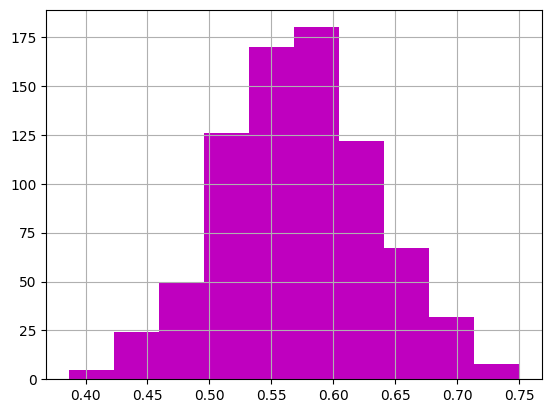

In [ ]:
plt.hist(modeloA,color='m',bins=10)
plt.grid(True)
plt.show()

**La probabilidad de $P(A-B\geq160)$** es:

In [ ]:
np.mean(modeloA)

0.5724750582508855

In [ ]:
np.std(modeloA)

0.06110694225090028

**Inciso b**

In [ ]:
nb= (2*np.std(incisob)*1.96/0.01)**2 #Calculo de N
print(nb)
Nb=mat.ceil(nb)#Redondeamos N al entero de arriba

1131.7253004550253


In [ ]:
def modeloB(n): #Función que simula N veces la toma de 125 bombillas de ambos fabricantes
  probabilidad=[]
  for i in range(n):
    s2=simulacionesb()  #probabilidades de A-B>=250 en N simulaciones de 125 eventos cada simulación
    probabilidad.append(np.mean(s2))  #Probabilidades de las medias muestrales P(A-B>=250)
  return probabilidad

In [ ]:
modeloB=modeloB(Nb)

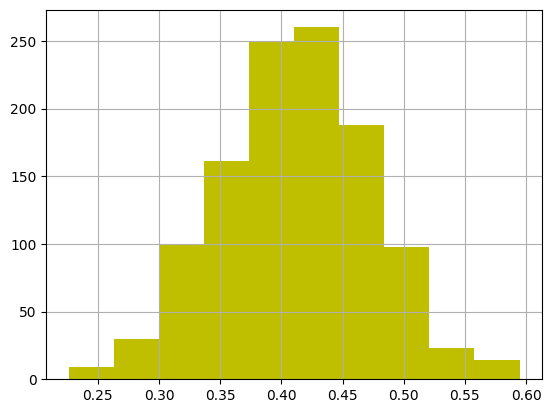

In [ ]:
plt.hist(modeloB, color='y',bins=10)
plt.grid(True)
plt.show()

**La probabilidad de $P(A-B\geq250)$ es:**

In [ ]:
np.mean(modeloB)

0.41169170141528266

In [ ]:
np.std(modeloB)

0.06160314831323869

## **7.Hallar intervalos de confianza**
\
$$\bar{x}-z_{\alpha/2} \cdot \frac{s}{\sqrt{n}} < \mu < \bar{x}+z_{\alpha/2}\cdot \frac{s}{\sqrt{n}}$$

**Inciso a**

In [ ]:
np.mean(modeloA) - 1.96*np.std(modeloA)/np.sqrt(Na), np.mean(modeloA) + 1.96*np.std(modeloA)/np.sqrt(Na)

(0.5681975722933225, 0.5767525442084486)

**Inciso b**

In [ ]:
np.mean(modeloB) - 1.96*np.std(modeloB)/np.sqrt(Nb), np.mean(modeloB) + 1.96*np.std(modeloB)/np.sqrt(Nb)

(0.408103012891399, 0.41528038993916633)

#**8. Solución analitica**

Como las dos variables A y B son independientes e identicamente distribuidas, entonces.

$C=A-B$ 

donde 

$\mu_C=\mu_A-\mu_B$  

$\sigma_C^2=\sigma_A^2+\sigma_B^2$

>$\mu_C=1400-1200=200$

>$\sigma_C^2=4000+10000=50000$

>$\sigma_C=223.61$

Para calcular $P(C\geq160)$ vamos a estandarizar $C$

>$Z=\frac{c-\mu_C}{\sigma_C}=\frac{160-200}{223.61}=-0.178888$

Ahora si buscamos calcular $P(Z\geq$$160)$, necesitamos saber $P(Z\geq-0.1789)$ con ayuda de las tablas de la distribución normal.

Con ayuda de las tablas, podemos saber el area bajo la curva normal estandar para $Z\geq-0.1788$ que nos da $0.5726$

>$P(A-B\geq160)=0.5726$

Para calcular $P(C\geq250)$ vamos a estandarizar $C$

>$Z=\frac{c-\mu_C}{\sigma_C}=\frac{250-200}{223.61}=0.2236$

Ahora si buscamos calcular $P(Z\geq$$250)$, necesitamos saber $P(Z\geq0.2236)$ con ayuda de las tablas de la distribución normal.

Con ayuda de las tablas, podemos saber el area bajo la curva normal estandar para $Z\geq0.2236$ que nos da $0.4115$

>$P(A-B\geq250)=0.4115$



#**9. Comparando la solución Analitica con la solución simulación para obtener el error de ambos incisos.**

In [31]:
errorA=(0.5726-np.mean(modeloA))/0.5726
errorB=(0.4115-np.mean(modeloB))/0.4115
print ('El error en el inciso a es',errorA)
print('El error en el inciso b es',errorB)

El error en el inciso a es 0.00021820074941404505
El error en el inciso b es -0.0004658600614403055
